In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, CubicSpline
from scipy.optimize import curve_fit
import time
import scipy

from openparticle import ParticleOperator, Fock
from openparticle.hamiltonians.free_hamiltonians import free_boson_Hamiltonian, free_fermion_Hamiltonian
from openparticle.hamiltonians.yukawa_hamiltonians import *
from openparticle.hamiltonians.renormalized_yukawa_hamiltonian import *
from openparticle.utils import *
from openparticle.dlcq import get_sector_basis, pdf, fock_sector_budget
from yukawa_utils import *


plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 24
plt.rc('text', usetex=True)
import warnings
warnings.filterwarnings('ignore')

In [14]:
mf = 1
mb = 0.5
g = 1
t = 1e-11

f_fb_basis = np.arange(1/2, 16, 2)
grounds = []
for res in f_fb_basis:
    basis = (
        get_sector_basis(resolution = res, n_fermions = 1, n_antifermions = 0, n_bosons = 0)
        + get_sector_basis(resolution = res, n_fermions = 1, n_antifermions = 0, n_bosons = 1)
    )   
    hamiltonian = renormalized_yukawa_hamiltonian(
            res=res, t=t, treg=0, g=g, mf=mf, mb=mb, verbose=False
        )

    tmp_mat = generate_matrix_hermitian(hamiltonian, basis)
    vals = np.linalg.eigvalsh(tmp_mat)

    grounds.append(min(vals))

Text(0, 0.5, '$M^2$')

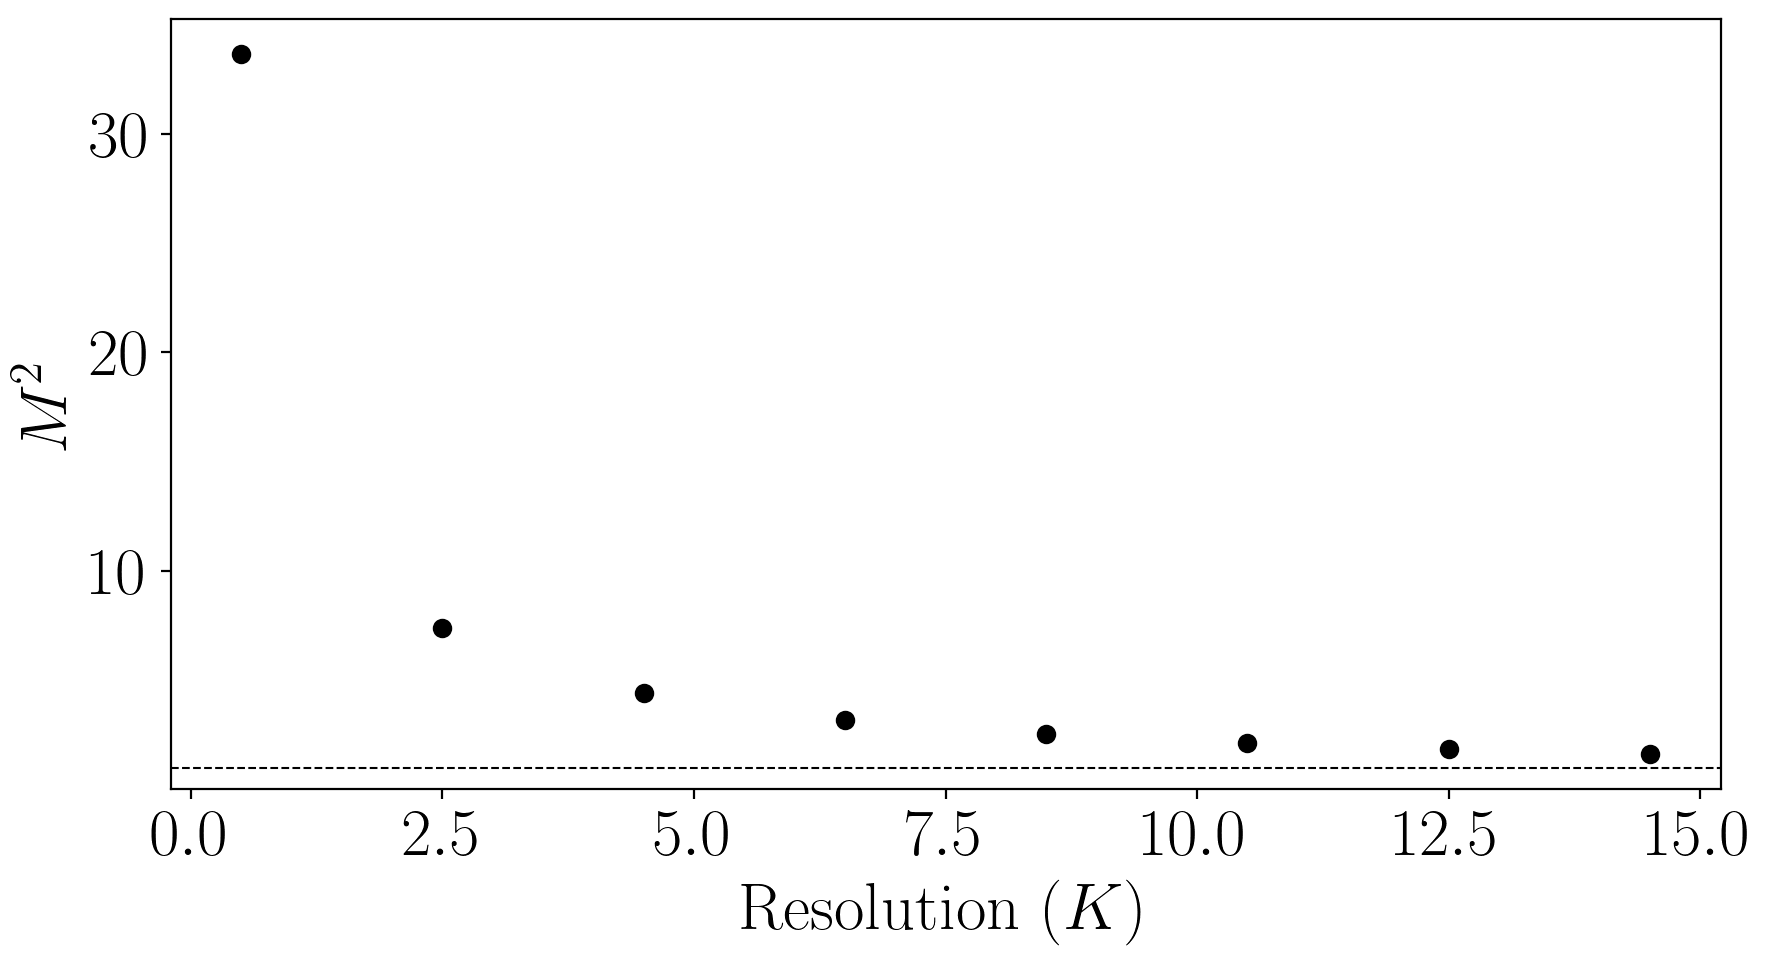

In [18]:
plt.figure(figsize=(10,5), dpi=200)


# plt.plot(f_fb_basis, eigenvalues_f_fb_basis, 'ko')
# for i, eig in enumerate(padded_eigenvalues):
#     plt.scatter(ff_ffb_basis, eig, color = 'black', marker = "_", s = 100)
plt.plot(f_fb_basis, grounds, 'ko')


plt.axhline(y=mf**2, color='k', linestyle = '--', linewidth = 0.75)
# plt.axhline(y=100, color='white')
plt.xlabel(r"Resolution $(K)$")
plt.ylabel(r"$M^2$")



In [10]:
mf = 1
mb = 0.5
t = 1e-7

def l(x, a, b, c):
    return a + b/x + c/(x**2)



f_fb_basis = np.arange(1/2, 16, 2)

ms = []
ms_uncertainty=[]
gs = [0, 0.1, 0.25, 0.5, 1]
for g in gs:
    print("g:", g)
    for res in f_fb_basis:
        eigenvalues_f_fb_basis = []
        basis = (
            get_sector_basis(resolution = res, n_fermions = 1, n_antifermions = 0, n_bosons = 0)
            + get_sector_basis(resolution = res, n_fermions = 1, n_antifermions = 0, n_bosons = 1)
        )   
        
        hamiltonian = renormalized_yukawa_hamiltonian(
                res=res, t=t, treg=0, g=g, mf=mf, mb=mb, verbose=False
            )
        tmp_mat = generate_matrix_hermitian(hamiltonian, basis)
        vals = np.linalg.eigvalsh(tmp_mat)
        eigenvalues_f_fb_basis.append(min(vals))
    params = curve_fit(l, f_fb_basis, eigenvalues_f_fb_basis)

    ms.append(params[0][0])
    ms_uncertainty.append(np.sqrt(np.diag(params[1]))[0])

g: 0
g: 0.1
g: 0.25
g: 0.5
g: 1


In [19]:
ms

[0.9999999932247693,
 0.9960385950280661,
 0.9793224651833408,
 0.9586688949928089,
 1.1371250676559166]

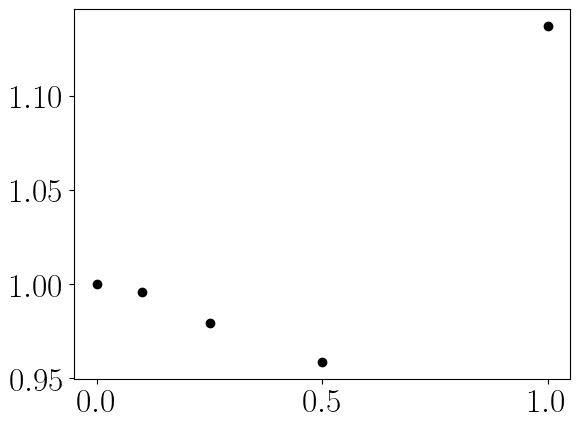

In [12]:
plt.plot(gs, ms, 'ko')

In [3]:
def get_sliced_basis(resolution, c):
    boson = [Fock([], [], [((resolution - 1, 1))])]

    f_fbar = [Fock([fermion_k_to_mode((resolution + i) / 2)], 
                    [fermion_k_to_mode((resolution - i) / 2)], []) for i in np.arange(1, c + 2, 2) ]
    f_fbar += [Fock([fermion_k_to_mode((resolution - i) / 2)], 
                    [fermion_k_to_mode((resolution + i) / 2)], []) for i in np.arange(1, c + 2, 2) ]
    return boson + f_fbar

In [23]:
mf = 1
mb = 0.5
g = 1

eigenvalues_boson_loop = []
eigenvalues_fermion_loop = []
resolutions_boson_loop = np.arange(1, 9, 1)
resolutions_fermion_loop = np.arange(1/2, 9, 1)
for res in resolutions_boson_loop:
    print("--- K = ", res, " ---")

    basis = impose_baryon_number(int(res), momentum_states_partition(res), 0)
    

    
    hamiltonian = yukawa_hamiltonian(
            res=int(res), g=g, mf=mf, mb=mb
        )

    tmp_mat = generate_matrix_hermitian(hamiltonian, basis)
    vals, vecs = np.linalg.eigh(tmp_mat)
    print(min(vals))
    eigenvalues_boson_loop.append(min(vals))

for res in resolutions_fermion_loop:
    print("--- K = ", res, " ---")

    basis = impose_baryon_number(int(res + 1/2), momentum_states_partition(res), 1)
    hamiltonian = yukawa_hamiltonian(
            res=int(res + 1/2), g=g, mf=mf, mb=mb
        )
    tmp_mat = generate_matrix_hermitian(hamiltonian, basis)
    vals, vecs = np.linalg.eigh(tmp_mat)
    print(min(vals))
    eigenvalues_fermion_loop.append(min(vals))
    


--- K =  1  ---
0.25000000000000006
--- K =  2  ---
0.13053128082967533
--- K =  3  ---
0.062142671060349444
--- K =  4  ---
0.007260641896504558
--- K =  5  ---
-0.04303329009029369
--- K =  6  ---
-0.16269847329625906
--- K =  7  ---
-0.6677302907961332
--- K =  8  ---
-1.1754207457097834
--- K =  0.5  ---
2.0000000000000004
--- K =  1.5  ---
0.7020697019890564
--- K =  2.5  ---
0.5080597365231064
--- K =  3.5  ---
0.22679860757005027
--- K =  4.5  ---
0.18754072405932698
--- K =  5.5  ---
0.025008022342269176
--- K =  6.5  ---
-0.025743417864236444
--- K =  7.5  ---
-0.17849777273849457
--- K =  8.5  ---
-0.22621323667876392


Text(0.5, 1.0, 'Lowest $M^2$ Eigenvalue in Respective Sectors')

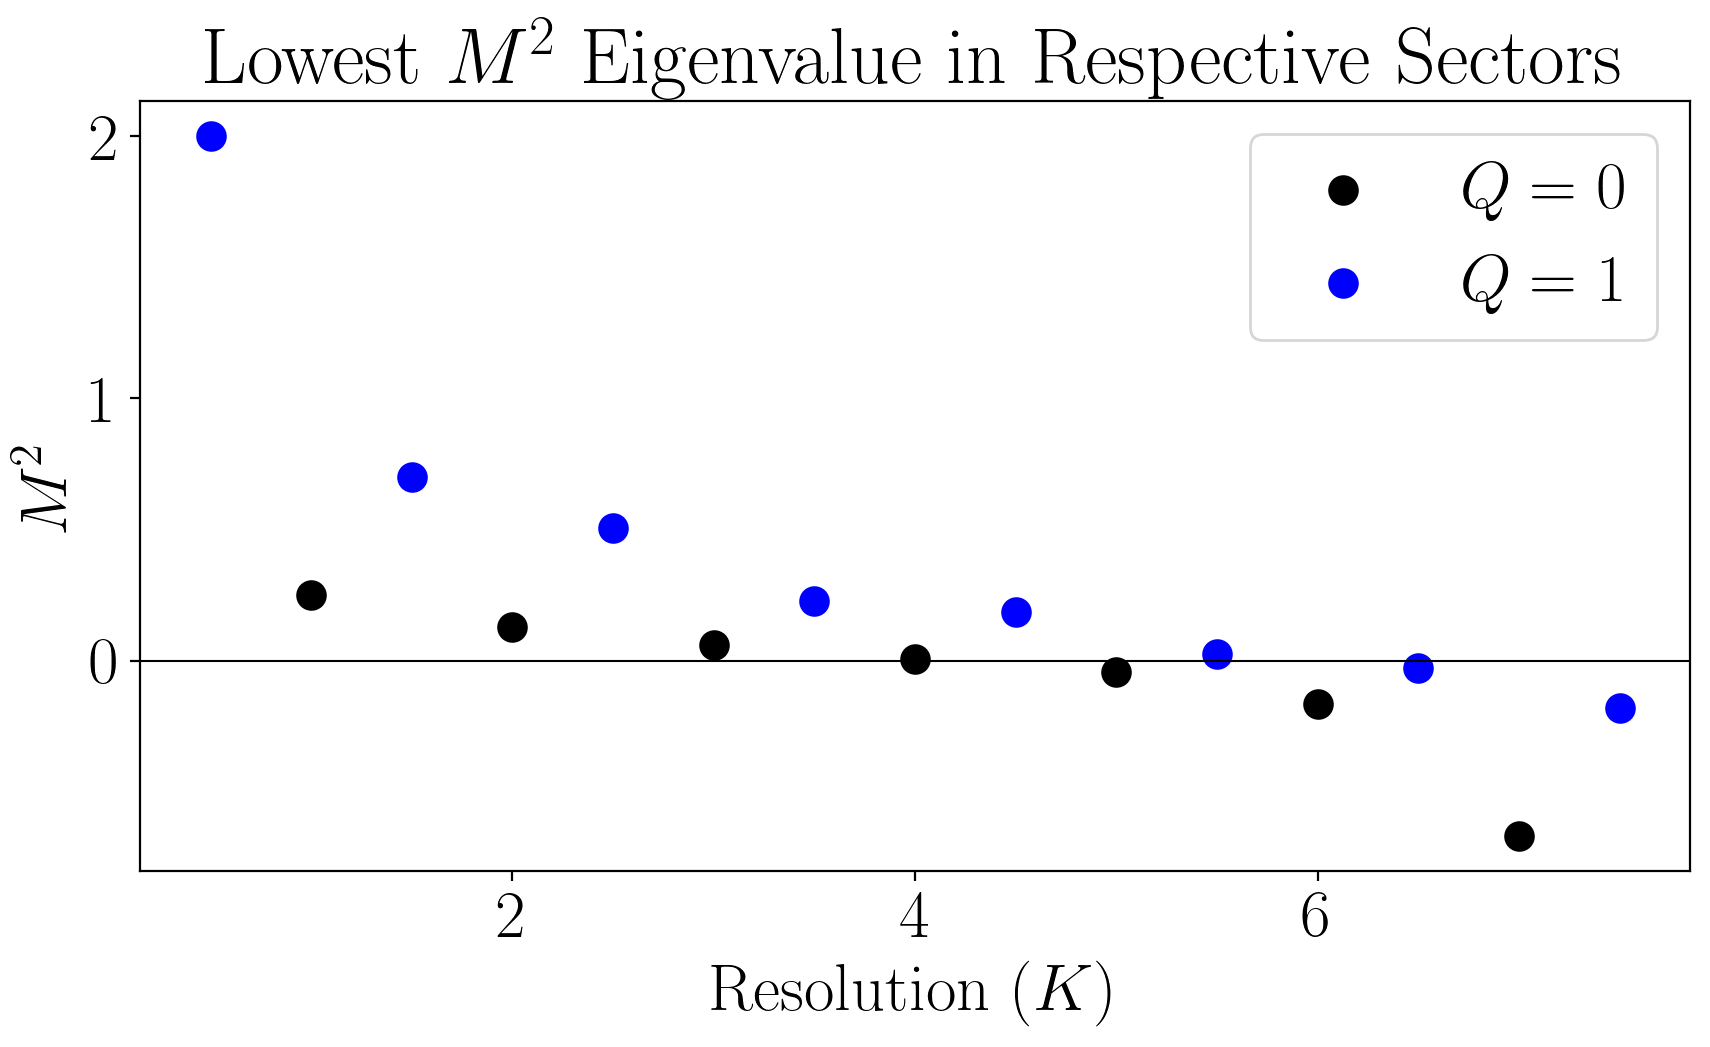

In [22]:
plt.figure(figsize=(10,5), dpi=200)
plt.scatter(resolutions_boson_loop, eigenvalues_boson_loop, color='black', marker='o', s=100, label = r'$Q = 0$')
plt.scatter(resolutions_fermion_loop, eigenvalues_fermion_loop, color='blue', marker='o', s=100, label = r'$Q = 1$')


# plt.axhline(y = mf**2)
# plt.axhline(y = mb**2)
plt.axhline(y=0, color='k', linewidth = 0.75)
# plt.axhline(y=100, color='white')
plt.xlabel(r"Resolution $(K)$")
plt.ylabel(r"$M^2$")
plt.legend()
plt.title(r"Lowest $M^2$ Eigenvalue in Respective Sectors")



In [42]:
mf = 1
mb = 0.5
g = 0.6

t = 1e-6
eigenvalues = []
# resolutions = np.concatenate((np.arange(2, 20, 6), np.arange(22, 26, 2)))
resolutions = np.arange(2, 16, 2)
for res in resolutions:
    print("--- K = ", res, " ---")

    basis = (
        get_sector_basis(resolution=res, n_fermions = 2,
                            n_antifermions = 0, n_bosons = 0)
        + get_sector_basis(resolution=res, n_fermions = 2,
                            n_antifermions = 0, n_bosons = 1)
        + get_sector_basis(resolution=res, n_fermions = 3,
                            n_antifermions = 1, n_bosons = 0)
        + get_sector_basis(resolution=res, n_fermions = 3,
                            n_antifermions = 1, n_bosons = 2)
        + get_sector_basis(resolution=res, n_fermions = 2,
                            n_antifermions = 0, n_bosons = 2)
    )

    hamiltonian = renormalized_yukawa_hamiltonian(
            res=res, t=t, treg=0, g=g, mf=mf, mb=mb, verbose=False
        )
    tmp_mat = generate_matrix_hermitian(hamiltonian, basis)
    vals = sorted(np.linalg.eigvalsh(tmp_mat))
    number_of_eigenstates = len(basis)
    eigenvalues.append(vals[:number_of_eigenstates])
    
max_eigenvalues = max(len(eig) for eig in eigenvalues)

padded_eigenvalues = np.array(
    [
        np.pad(eig, (0, max_eigenvalues - len(eig)), constant_values=np.nan)
        for eig in eigenvalues
    ]
)

padded_eigenvalues = padded_eigenvalues.T
grounds = [min(i) for i in eigenvalues]


--- K =  2  ---
--- K =  4  ---
--- K =  6  ---
--- K =  8  ---
--- K =  10  ---
--- K =  12  ---
--- K =  14  ---


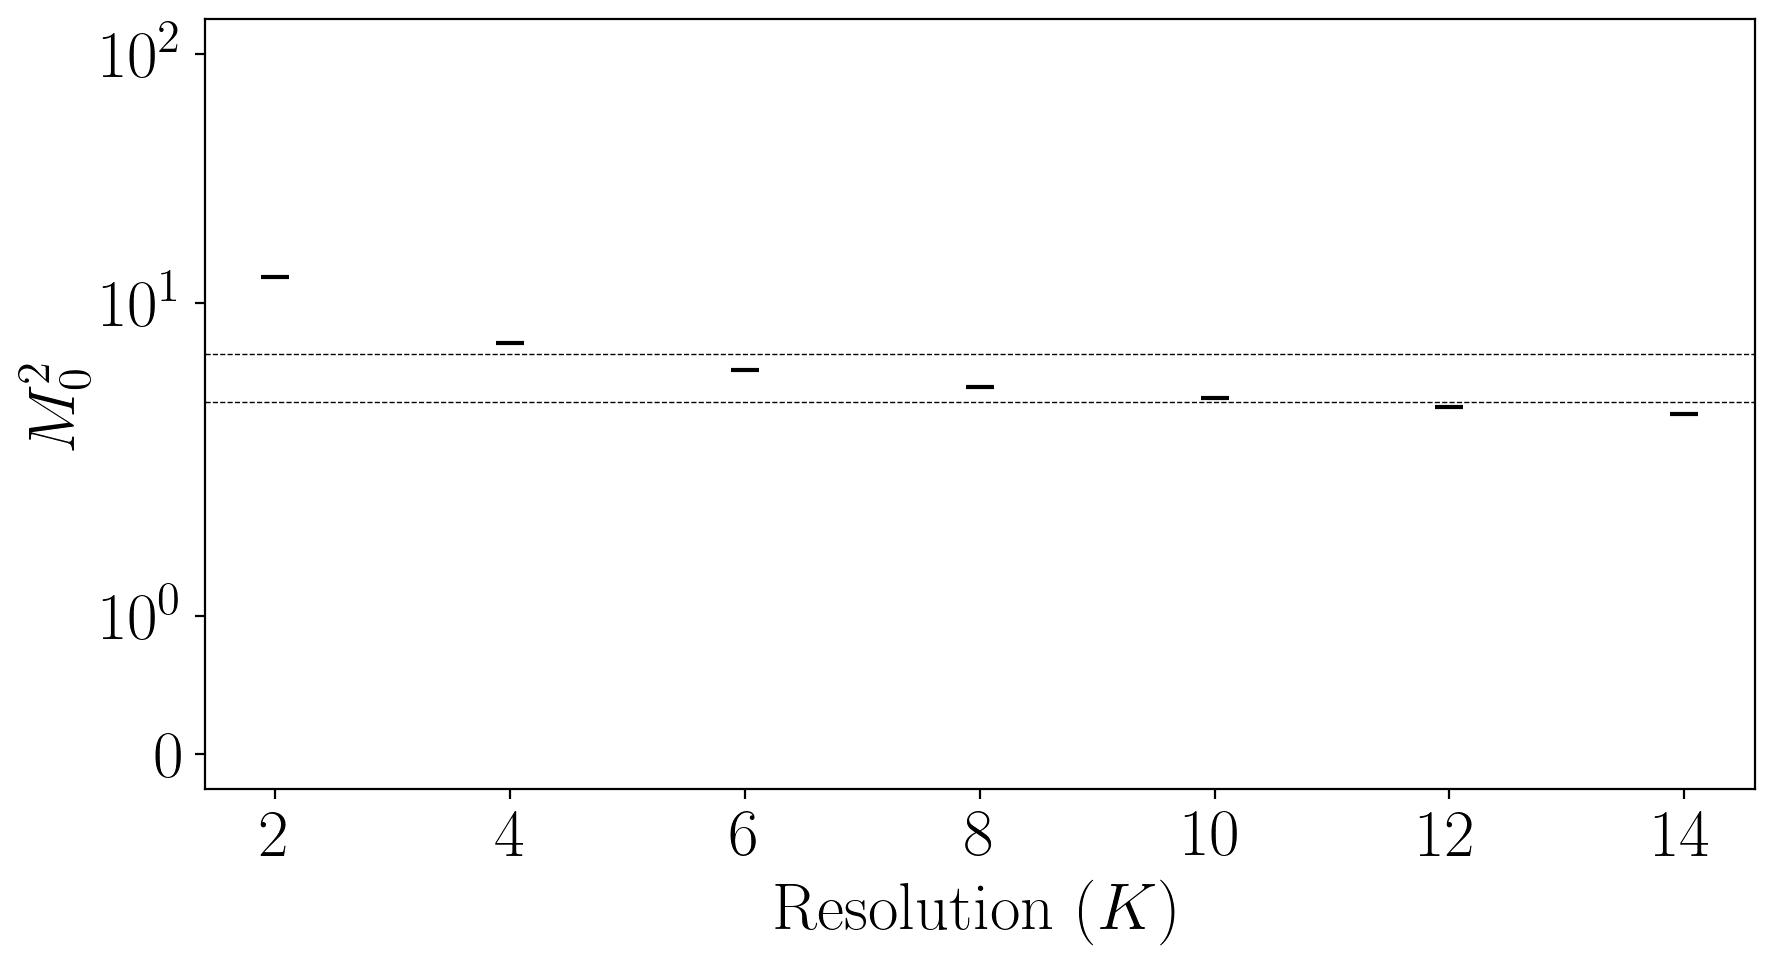

In [ ]:
plt.figure(figsize=(10,5), dpi=200)
colors = plt.cm.viridis(np.linspace(0, 1, padded_eigenvalues.shape[0]))
for i in range(len(grounds)):
    plt.scatter(resolutions[i], grounds[i], color='black', marker='_', s=100)
# for i, eig in enumerate(padded_eigenvalues):
#     plt.scatter(resolutions, eig, color = 'black', marker = "_", s = 100)

y1 = (2 * mf + 0 * mb)**2
y2 = (2 * mf + 1 * mb)**2

plt.axhline(y=y1, color='k', linestyle='--', linewidth=0.5, label=r"$4m_f^2$")
plt.axhline(y=y2, color='k', linestyle='--', linewidth=0.5, label=r"$\left(2m_f + m_b \right)^2$")
plt.axhline(y=0, color='white')
plt.axhline(y=1, color='white')
plt.axhline(y=100, color='white')
plt.xlabel(r"Resolution $(K)$")
plt.ylabel(r"$M_0^2$")

plt.yscale('symlog')


In [44]:
grounds

[12.689035510351061,
 6.911110845559623,
 5.381789889057948,
 4.6254846477009774,
 4.160873964192575,
 3.8409880436228048,
 3.6047180530047735]

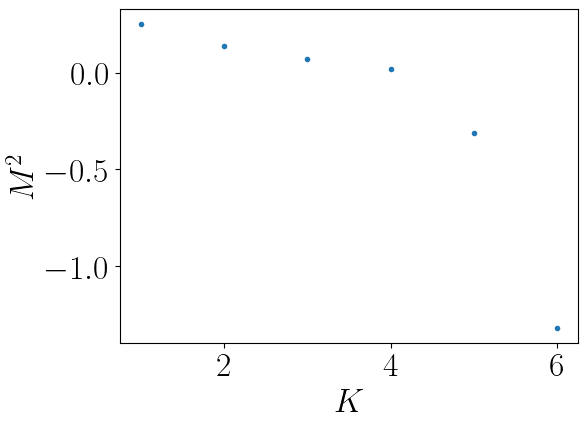

In [161]:
def m2_vs_res(res_vals, baryon_number, coupling = 1, mf = 1, mb = 1):


    evals = []
    K_vals = list(range(1, res_vals + 1))
    L_vals = []

    for res in K_vals:
        ham = yukawa_hamiltonian(res = res, g = coupling, mf=mf, mb = mb)
        K_tmp_basis = momentum_states_partition(res)
        baryon_number_basis = impose_baryon_number(res, K_tmp_basis, baryon_number=baryon_number)

        tmp_mat = generate_matrix(ham, baryon_number_basis)

        if tmp_mat.shape != (0, 0):
            vals, vecs = np.linalg.eigh(tmp_mat)

            evals.append(min(vals))
            # L_vals.append(2*np.pi * res)
            # psi = numpy_to_fock(vecs[:, 0], baryon_number_basis)
            # max_weight, state = max_fock_weight(psi)
            # print(res, max_weight *  state, min(vals))

    return evals, K_vals

res = 6
g = 1
mf = 1
mb = 0.5
# plt.figure(figsize = (4, 4), dpi = 200)
e, K = m2_vs_res(res_vals=res, baryon_number = 0, coupling = g, mf = mf, mb = mb)
plt.scatter(K, np.array(e), marker='.', label = 'B = 0')
plt.scatter([], [], color = 'white', label = f'g = {g}, $m_f$ = {mf}, $m_b$ = {mb}')
plt.xlabel(f'$K$')
plt.ylabel(f'$M^2$')
plt.tight_layout()
# plt.legend()
plt.show()

In [38]:
def f(x, a, b, c):
    return a + b/x + c/(x**2)

cut = 0

params = curve_fit(f, resolutions[cut:], grounds[cut:])
f(np.inf, *params[0])

2.014672572809263

In [279]:
# fock_sector_budget(eigenstates[0])

In [ ]:
eigenvalues = []
resolutions = np.arange(2, 14, 2)
# resolutions = [24]
for res in resolutions:
    print("--- K = ", res, " ---")

    # basis = (
    #     get_Q_nonzero_sector_basis(resolution=res, n_fermions = 2, n_bosons = 0)
    #     + get_Q_nonzero_sector_basis(resolution=res, n_fermions = 2, n_bosons = 1)
    # )
    basis = momentum_states_partition(res, 4)
    hamiltonian = yukawa_hamiltonian(
            res=res, g=g, mf=mf, mb=mb
        )
    tmp_mat = generate_matrix_hermitian(hamiltonian, basis)
    vals = sorted(np.linalg.eigvalsh(tmp_mat))
    number_of_eigenstates = len(basis)
    eigenvalues.append(vals[:number_of_eigenstates])
    
max_eigenvalues = max(len(eig) for eig in eigenvalues)

padded_eigenvalues = np.array(
    [
        np.pad(eig, (0, max_eigenvalues - len(eig)), constant_values=np.nan)
        for eig in eigenvalues
    ]
)

padded_eigenvalues = padded_eigenvalues.T
grounds = [min(i) for i in eigenvalues]

    
# basis_sizes = [len((
#     get_Q_nonzero_sector_basis(resolution=res, n_fermions = 2, n_bosons = 0)
#     + get_Q_nonzero_sector_basis(resolution=res, n_fermions = 2, n_bosons = 1))
# ) for res in resolutions]
        

--- K =  2  ---
--- K =  4  ---
--- K =  6  ---
--- K =  8  ---
--- K =  10  ---
--- K =  12  ---


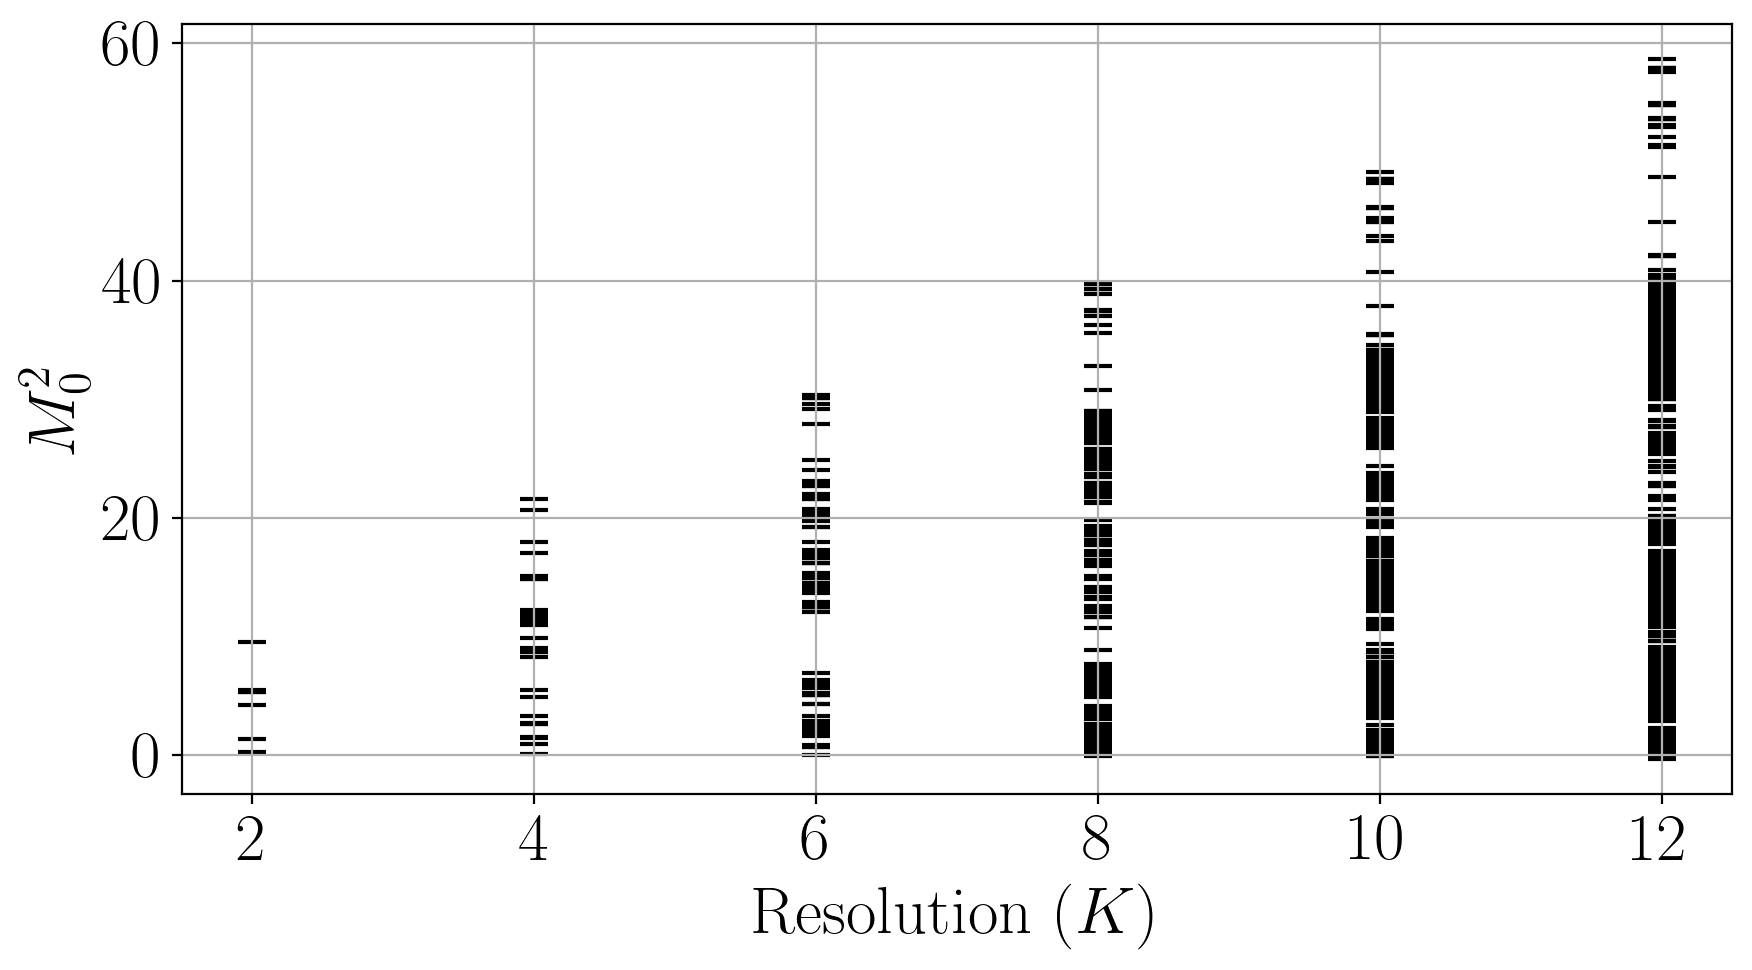

In [ ]:
plt.figure(figsize=(10,5), dpi=200)
colors = plt.cm.viridis(np.linspace(0, 1, padded_eigenvalues.shape[0]))
for i, eig in enumerate(padded_eigenvalues):
    plt.scatter(resolutions, eig, color='black', marker='_', s=100)

plt.xlabel(r"Resolution $(K)$")
plt.ylabel(r"$M_0^2$")

# y1 = (2 * mf + 0 * mb)**2
# y2 = (2 * mf + 1 * mb)**2

# plt.axhline(y=y1, color='k', linestyle='--', linewidth=1, label=r"$4m_f^2$")
# plt.axhline(y=y2, color='k', linestyle='--', linewidth=1, label=r"$\left(2m_f + m_b \right)^2$")

# # Add text labels near the horizontal lines
# plt.text(resolutions[0] * -.2, y1, r"$4m_f^2$", va='center', fontsize=12)
# plt.text(resolutions[0] * -1.05, y2, r"$\left(2m_f + m_b \right)^2 -$", va='center', fontsize=12)

# plt.yscale('log')
plt.grid()


In [ ]:
max_res = 10
mf = 1
mb = 0.6
g = 0.5
Q = 2
n_particles = 4
num_eigenstates = 'all'
# resolutions = [max_res]
resolutions = np.arange(2, max_res, 1)

eigenvalues, eigenvectors = get_eigenstates(resolutions, g = g, mf = mf, mb = mb, Q = Q, num_eigenstates = num_eigenstates)#, n_particles = n_particles)

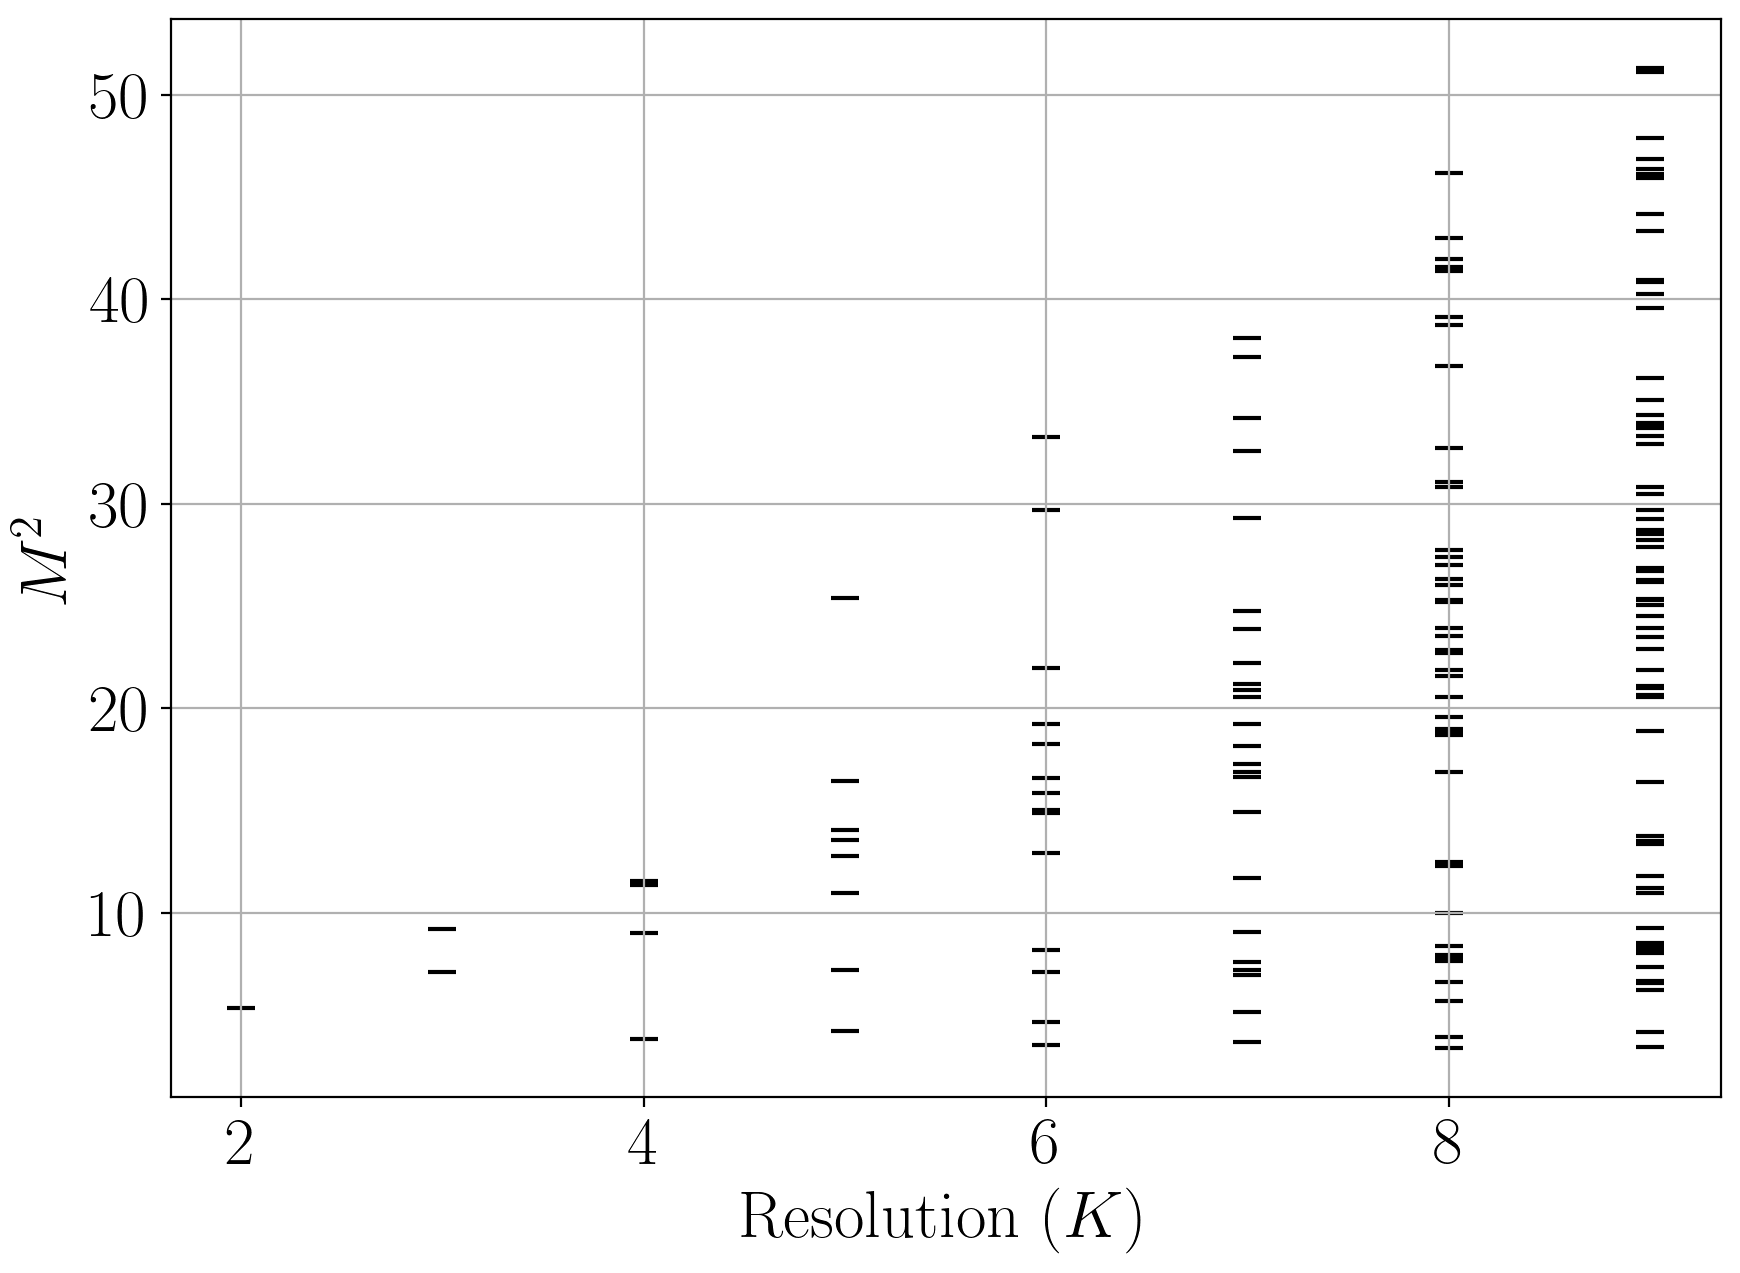

In [ ]:
plt.figure(figsize = (10, 7), dpi = 200)
# K_values = range(1, max_res + 1)
colors = plt.cm.viridis(np.linspace(0, 1, eigenvalues.shape[0]))
for i, eig in enumerate(eigenvalues):
    # plt.plot(K_values, eig, color = colors[i], marker='o', label=f" $E_{i}$")#, label=f" $E_{i}$")#colors = colors[i]
    plt.scatter(resolutions, eig, color = 'black', marker = '_', s = 100)

plt.xlabel("Resolution ($K$)")
plt.ylabel("$M^2$")
# plt.title( f'g = {g}, $m_f$ = {mf}, $m_b$ = {mb}')
# plt.legend()
# plt.yscale('symlog')
plt.grid()
plt.savefig("../bare_spectrum.pdf", dpi=300)

In [ ]:
psi = eigenvectors[0]
res = max_res

fermion_pdf = pdf(res, psi, 'fermion')
antifermion_pdf = pdf(res, psi, 'antifermion')
boson_pdf = pdf(res, psi, 'boson')

x_fermion = np.array([k/res for k in np.arange(1/2, res, 1)])
x_boson = np.array([k/res for k in np.arange(1, res + 1, 1)])


plt.figure(figsize = (10, 7), dpi = 200)

if np.allclose(fermion_pdf, antifermion_pdf):
    plt.scatter(x_fermion, 2 * x_fermion * np.real(fermion_pdf), label = r'$f+ \bar{f}$')

else:
    plt.scatter(x_fermion, x_fermion * np.real(fermion_pdf), label = f'Fermion')
    plt.scatter(x_fermion, x_fermion * np.real(antifermion_pdf), label = f'Antifermion')
plt.scatter(x_boson, x_boson * np.real(boson_pdf), label = f'b')


# plt.scatter([], [], color = 'white', label = f'{max_weight}')
plt.legend()
plt.xlabel(f'$x$')
plt.ylabel(f'$xf(x)$')
# plt.title(f"Yukawa $Q = {baryon_number}$ bound state PDF")

In [ ]:
def m2_vs_res(res_vals, baryon_number, coupling = 1, mf = 1, mb = 1, eigenstate = 0):


    evals = []
    # K_vals = list(range(1, res_vals + 1))
    L_vals = []

    for res in res_vals:
        ham = yukawa_Hamiltonian(res = res, g = coupling, mf=mf, mb = mb)
        K_tmp_basis = momentum_states_partition(res)
        baryon_number_basis = impose_baryon_number(res, K_tmp_basis, baryon_number=baryon_number)
        # cutoff_states = impose_fock_sector_cutoff(baryon_number_basis, n_particles)

        tmp_mat = generate_matrix(ham, baryon_number_basis)

        if tmp_mat.shape != (0, 0):
            vals, vecs = np.linalg.eigh(tmp_mat)
            evals.append(sorted(vals)[eigenstate])
            L_vals.append(2*np.pi * res)
            psi = numpy_to_fock(vecs[:, eigenstate], baryon_number_basis)
            max_weight, state = max_fock_weight(psi)
            # print(res, max_weight *  state, sorted(vals)[eigenstate])
            print(res, psi, sorted(vals)[eigenstate])

    return evals


In [ ]:
res = 6
g = 1
mf = 1
mb = 0.1
n_particles = 10
# kvals = [2**p for p in range(1, res)]
kvals = list(range(3, res + 1))
plt.figure(figsize = (4, 4), dpi = 200)
e = m2_vs_res(res_vals=kvals, baryon_number = 0, coupling = g, mf = mf, mb = mb, eigenstate = 6)
plt.scatter(kvals, np.array(e), marker='.')
# plt.scatter([], [], color = 'white', label = f'g = {g}, $m_f$ = {mf}, $m_b$ = {mb}')
plt.xlabel('Resolution ($K$)')
plt.ylabel(f'$M^2$')
plt.title( f'g = {g}, $m_f$ = {mf}, $m_b$ = {mb}')
plt.tight_layout()
# plt.legend()
plt.show()


In [ ]:
resolution = 3

mf = 1
mb = 0.1
K_tmp_basis = momentum_states_partition(res)
baryon_number_basis = impose_baryon_number(res, K_tmp_basis, baryon_number=0)

m2 = []
for coupling in range(0, 5):
    ham = yukawa_Hamiltonian(res = resolution, g = coupling, mf=mf, mb = mb)
    tmp_mat = generate_matrix(ham, baryon_number_basis)
    m2.append(min(np.linalg.eigvalsh(tmp_mat)))
plt.scatter(np.arange(0, 5, 1), m2, label = f'Res. = {resolution}')
plt.xlabel(f'$g$')
plt.ylabel(
    f'$M^2$'
)
plt.legend()

### Partition $H$ into blocks of definite $P^+$

In [ ]:
res = 2
min_res = res
g = 1
mf = 1
mb = 0.1

t = 0.1
treg = 0.01

basis = [momentum_states_partition(i)[j] for i in range(min_res, res + 1) for j in range(len(momentum_states_partition(i)))]
matrix = np.real(
        generate_matrix(yukawa_Hamiltonian(res, g = g, mf = mf, mb = mb), basis)
    )
# matrix = np.real(
#         generate_matrix(renormalized_Yukawa_hamiltonian(res = res, t = t, treg = treg, g = g, mf = mf, mb = mb), basis)
#     )
plt.imshow(
    matrix,
    cmap = 'Blues',
)
n_states_i = 0
for i in range(min_res, res + 1):
    n_states_i += len(momentum_states_partition(i))
    plt.axvline(x=n_states_i - 0.5, color='black', linewidth=1)
    plt.axhline(y=n_states_i - 0.5, color='black', linewidth=1)
plt.colorbar()
plt.title(f'Yukawa Hamiltonian at $L = {2 * res}\pi$')

In [ ]:
res = 7
g = 1
mf = 1
mb = 0.1
baryon_number = 0
eigenstate = 1

ham = yukawa_Hamiltonian(res = res, g = g, mf = mf, mb = mb)
basis = momentum_states_partition(res)
basis = impose_baryon_number(res = res, basis = basis, baryon_number=baryon_number)
K_matrix = generate_matrix(ham, basis)

vals, vecs = np.linalg.eigh(K_matrix)
psi = numpy_to_fock(vecs[:, eigenstate], basis)
max_weight, _ = max_fock_weight(psi)

fermion_pdf = pdf(res, psi, 'fermion')
antifermion_pdf = pdf(res, psi, 'antifermion')
boson_pdf = pdf(res, psi, 'boson')

x_fermion = np.array([k/res for k in np.arange(1/2, res, 1)])
x_boson = np.array([k/res for k in np.arange(1, res + 1, 1)])


plt.figure(figsize = (4, 4), dpi = 200)

if np.allclose(fermion_pdf, antifermion_pdf):
    plt.scatter(x_fermion, 2 * x_fermion * np.real(fermion_pdf), label = f'Fermion $+$ Antifermion')

else:
    plt.scatter(x_fermion, x_fermion * np.real(fermion_pdf), label = f'Fermion')
    plt.scatter(x_fermion, x_fermion * np.real(antifermion_pdf), label = f'Antifermion')
plt.scatter(x_boson, x_boson * np.real(boson_pdf), label = f'Boson')
# plt.scatter([], [], color = 'white', label = f'{max_weight}')
plt.legend()
plt.xlabel(f'$x$')
plt.ylabel(f'$xf(x)$')
# plt.xscale('log')
plt.title(f"Yukawa $Q = {baryon_number}$ bound state PDF")

## New $\mathcal{O}(g^2)$ Diagrams

In [ ]:
def renormalized_m2_vs_res(res_vals, t, treg, g, mf, mb, baryon_number):


    evals = []
    # K_vals = list(range(1, res_vals + 1))
    L_vals = []

    for res in res_vals:
        ham = renormalized_Yukawa_hamiltonian(res = res, t = t, treg = treg, g = g, mf = mf, mb = mb)
        K_tmp_basis = momentum_states_partition(res)
        baryon_number_basis = impose_baryon_number(res, K_tmp_basis, baryon_number=baryon_number)

        tmp_mat = generate_matrix(ham, baryon_number_basis)

        if tmp_mat.shape != (0, 0):
            vals, vecs = np.linalg.eigh(tmp_mat)

            evals.append(min(vals))
            L_vals.append(2*np.pi * res)
            psi = numpy_to_fock(vecs[:, 0], baryon_number_basis)
            max_weight, state = max_fock_weight(psi)
            print(res, max_weight *  state, min(vals))
            # print(res, psi, min(vals))

    return evals


In [ ]:
res = 5
t = 0.1
treg = 0
mf = 1
mb = 0.1
g = 1

kvals = list(range(1, res + 1))
plt.figure(figsize = (4, 4), dpi = 200)
e = renormalized_m2_vs_res(res_vals=kvals, t = t, treg = treg, g = g, mf = mf, mb = mb, baryon_number=0)
plt.scatter(kvals, np.array(e), marker='.', label = 'Q = 0')
plt.scatter([], [], color = 'white', label = f'g = {g}, $m_f$ = {mf}, $m_b$ = {mb}')
plt.xlabel('Res.')
plt.ylabel(f'$M^2$')
plt.tight_layout()
plt.legend()

plt.show()

In [ ]:
res = 5
mb = 0.1
g = 0.1
fig, ax = plt.subplots()
reses = [1, 2, 3, 4, 5]

for t in [0.001, 0.01, 0.1]:
    ham = renormalized_Yukawa_hamiltonian(res = res, t = t, treg = 0, g = g, mf = 1, mb = mb)
    e = renormalized_m2_vs_res(res_vals=reses, t = t, treg = treg, g = g, mf = mf, mb = mb, baryon_number=0)
    L = 2*np.pi * res
        # mus = []
        # ks = []
    # for term, coeff in ham.op_dict.items():
    #     if 2 in [t[0] for t in term] and len(term) == 2:
    #         mode = term[0][1]
    #         k = mode + 1
    #         mu = coeff * p(k, L)
    #         ks.append(k)
    #         mus.append(mu)


    ax.plot(reses, np.array(e) - mb**2, ls = "", label = f'$t = {t}$', marker="o")

# ax.axhline(y=mb**2, color="black", alpha = 1, linewidth = 1)

# ax.axhline(y=e, color="black", alpha = 1, linewidth = 1)


# yticks = [0, 0.01, 0.02, 0.04, 0.06, 0.08, 0.1]
# yticklabels = [0, f'$M^2, \mu^2_0$', 0.02,  0.04, 0.06, 0.08, 0.1]
# ax.set_yticks(yticks)
# ax.set_yticklabels(yticklabels)
# ax.set_xticks(ks)


plt.ylabel(f'$M^2 - \mu_0^2$')
plt.xlabel('$K$')
plt.title(f'$g = {g}$')
plt.xticks(reses)

plt.legend()
plt.show()

In [ ]:
res = 6
t = 0.1
treg = 0
mf = 1
mb = 0.1
g = 0.1
baryon_number = 0


ham = renormalized_Yukawa_hamiltonian(res = res, t = t, treg = treg, g = g, mf = mf, mb = mb)
basis = momentum_states_partition(res)
basis = impose_baryon_number(res = res, basis = basis, baryon_number=baryon_number)
K_matrix = generate_matrix(ham, basis)

vals, vecs = np.linalg.eigh(K_matrix)



In [ ]:
eigenstate = 4

psi = numpy_to_fock(vecs[:, eigenstate], basis)
max_weight, _ = max_fock_weight(psi)


fermion_pdf = pdf(res, psi, 'fermion')
antifermion_pdf = pdf(res, psi, 'antifermion')
boson_pdf = pdf(res, psi, 'boson')

x_fermion = np.array([k/res for k in np.arange(1/2, res, 1)])
x_boson = np.array([k/res for k in np.arange(1, res + 1, 1)])


plt.figure(figsize = (10, 7), dpi = 200)

if np.allclose(fermion_pdf, antifermion_pdf):
    plt.scatter(x_fermion, 2 * x_fermion * np.real(fermion_pdf), label = r'$f+ \bar{f}$')

else:
    plt.scatter(x_fermion, x_fermion * np.real(fermion_pdf), label = f'Fermion')
    plt.scatter(x_fermion, x_fermion * np.real(antifermion_pdf), label = f'Antifermion')
plt.scatter(x_boson, x_boson * np.real(boson_pdf), label = f'b')
# plt.scatter([], [], color = 'white', label = f'{max_weight}')
plt.legend()
plt.xlabel(f'$x$')
plt.ylabel(f'$xf(x)$')
# plt.title(f"Yukawa $Q = {baryon_number}$ bound state PDF")

In [ ]:
def get_renormalized_eigenstates_old(resolutions, t,  g, mf, mb, Q, num_eigenstates, 
                                 n_particles: int = None, return_focks: bool = False, verbose:bool = False):
    eigenvalues = []
    eigenstates = []

    initial_time = time.time()
    for res in resolutions:
        if verbose:
            print("---K = ", res, "---")
        res_time_init = time.time()
        hamiltonian = renormalized_yukawa_hamiltonian(res = res, t = t, treg = 0, g = g, mf = mf, mb = mb, verbose = verbose)
        # hamiltonian += 57.42051673105974 * ParticleOperator('b0^ b0 d0^ d0')
        if verbose:
            print("Size of Hamiltonian:", len(hamiltonian))
        if verbose:
            print("Hamiltonian generated in:", time.time() - res_time_init)
        res_time_init = time.time()
        res_tmp_basis = momentum_states_partition(res, n_particles = n_particles)
        if verbose:
            print("Basis generated in:", time.time() - res_time_init)
        res_time_init = time.time()
        baryon_number_basis = impose_baryon_number(res, res_tmp_basis, baryon_number=Q)
        res_time_init = time.time()
        
        if verbose:
            print("Generating", len(baryon_number_basis), "x", len(baryon_number_basis), "Matrix...")
        # tmp_mat = generate_matrix(hamiltonian, cutoff_basis)
        tmp_mat = generate_matrix_hermitian(hamiltonian, baryon_number_basis)
        if verbose:
            print("Matrix generated in:",  time.time() - res_time_init)
        res_time_init = time.time()


        # tmp_mat = generate_matrix(hamiltonian, baryon_number_basis)
        if tmp_mat.shape != (0, 0):
            if verbose:
                print("Calculating eigenvalues...")
            vals, vecs = np.linalg.eigh(tmp_mat)
            if verbose:
                print("Eigenvalues calculated in:", time.time() - res_time_init)
            vals = sorted(vals)

        start = time.time()
        if num_eigenstates != 'all':
            eigenvalues.append(vals[:num_eigenstates])
            if return_focks:
                for i in range(0, num_eigenstates):
                    eigenstates.append(numpy_to_fock(vecs[:, i], baryon_number_basis))
        else: 
            number_of_eigenstates = len(baryon_number_basis)
            eigenvalues.append(vals[:number_of_eigenstates])
            if return_focks:
                for i in range(0, number_of_eigenstates):
                    eigenstates.append(numpy_to_fock(vecs[:, i], baryon_number_basis))
        end = time.time()
        if verbose and return_focks:
            print("Time to 'Fockify':", end - start)
        
    
    max_eigenvalues = max(len(eig) for eig in eigenvalues)

    padded_eigenvalues = np.array([
        np.pad(eig, (0, max_eigenvalues - len(eig)), constant_values=np.nan)
        for eig in eigenvalues
    ])

    padded_eigenvalues = padded_eigenvalues.T
    # assert all(padded_eigenvalues > 0)
    return padded_eigenvalues, eigenstates

Text(0.5, 1.0, 'Fermion Loop')

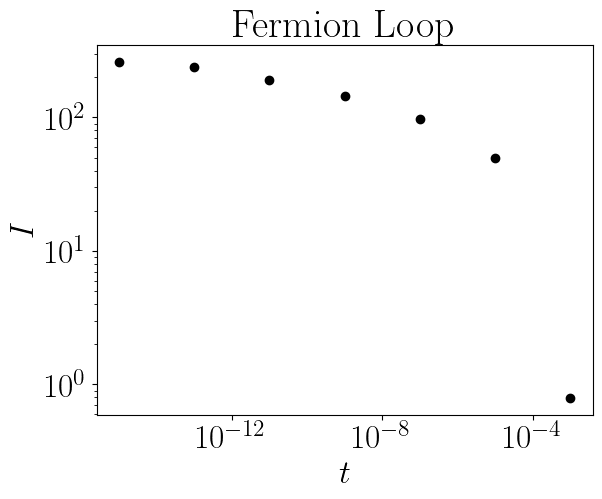

In [ ]:
for t in [1e-3, 1e-5, 1e-7, 1e-9, 1e-11, 1e-13, 1e-15]:
    plt.scatter(t, fermion_loop(t = t, p = p(1/2, L = 2*np.pi * 19), mf = 1, mb = 0.4), color = 'k')

plt.yscale('log')
plt.xscale('log')
plt.ylabel(f'$I$')
plt.xlabel(f'$t$')
plt.title("Fermion Loop")

In [ ]:
mf = 1
mb = 0.4
g = 1
Q = 0
num_eigenstates = 1
max_res = 11
resolutions = np.arange(3, max_res + 1, 2)
ts = [1e-14, 1e-8, 1e-4]


eigs_t = []
for t in ts:
        eigs = []
        for res in resolutions:
                basis = get_Q0_sector_basis(res, 1, 2)
                vals = get_renormalized_eigenstates([res], t = t, g = g, mf = mf, 
            mb = mb, Q = Q, num_eigenstates = num_eigenstates, basis = basis, verbose = False)[0][0][0]
                eigs.append(vals)
        eigs_t.append(eigs)




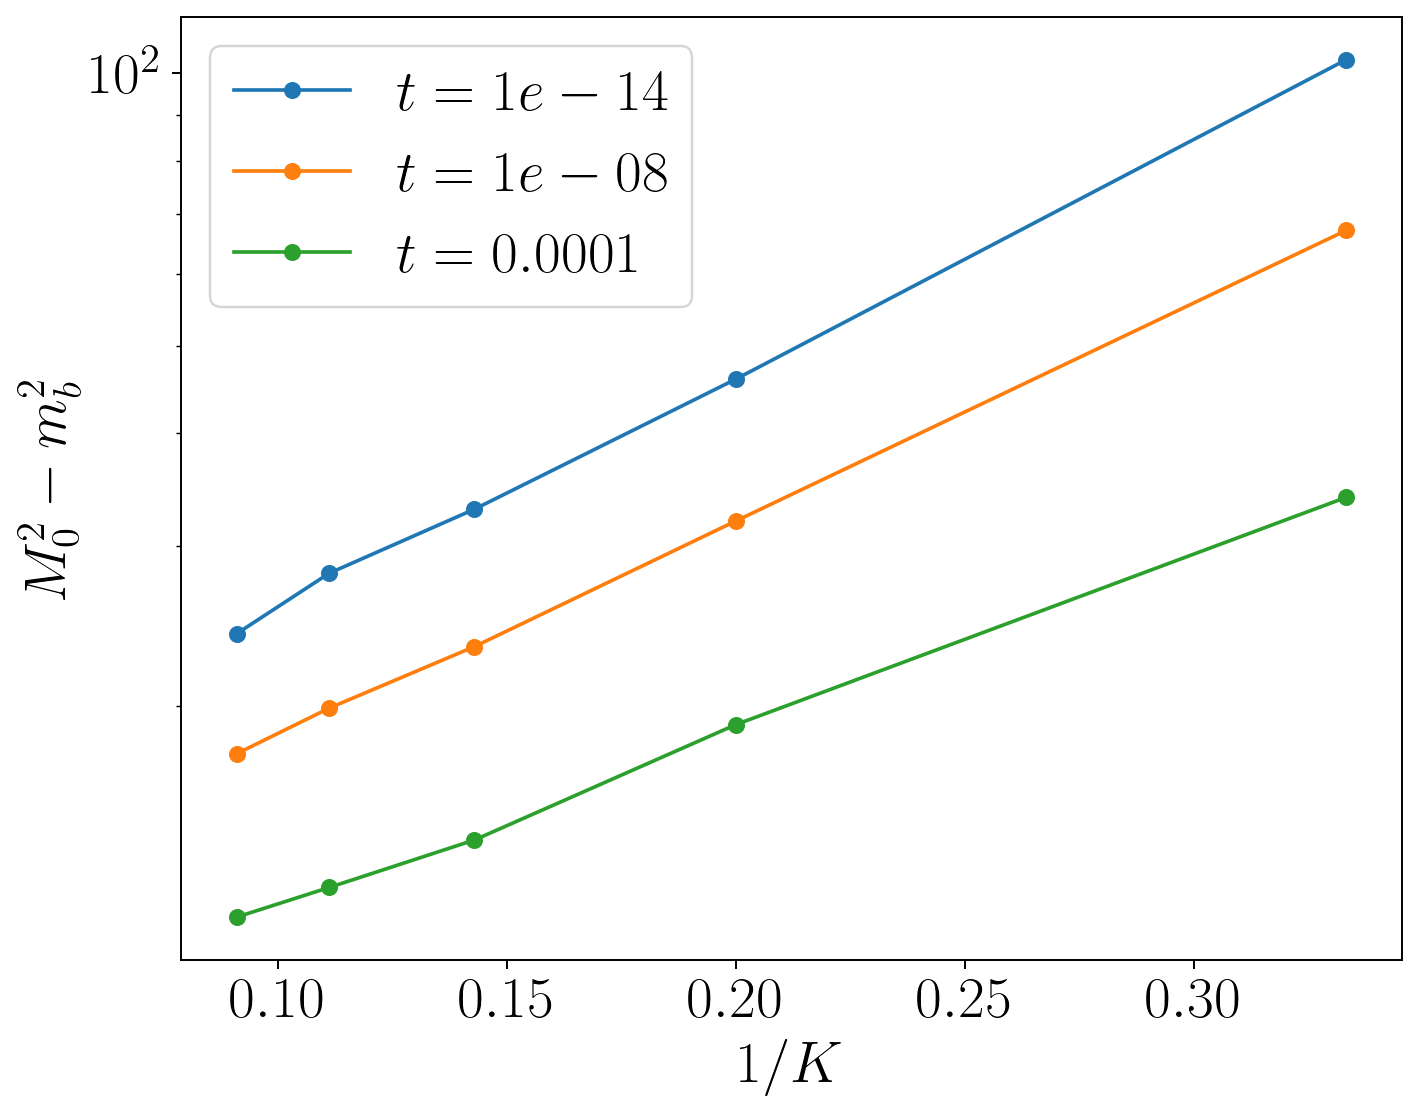

In [ ]:
plt.figure(figsize = (9,7), dpi = 175)
for i, curve in enumerate(eigs_t):
    plt.plot(1/resolutions, np.array(curve) - mb**2, 'o-', label = f'$t = {ts[i]}$')
plt.xlabel(f'$1/K$')
plt.ylabel(f'$M^2_0 - m_b^2$')
plt.yscale('log')
plt.legend(loc = 'upper left')


In [ ]:
max_res = 13
mf = 1
mb = 0.4
g = 1
Q = 0

basis = get_Q0_sector_basis(max_res, 1, 1) + get_Q0_sector_basis(max_res, 0, 1)
num_eigenstates = 'all'
resolutions = [max_res]
ts = np.concatenate((np.logspace(-15, -6, num = 2), np.logspace(-5, -2, num = 5), np.logspace(-1, 1, num = 2)))

eigs = []
for t in ts:
    start = time.time()
    print("***** t = ", t, "*****")
    vals = get_renormalized_eigenstates(resolutions, t = t, g = g, mf = mf, 
            mb = mb, Q = Q, num_eigenstates = num_eigenstates, basis = basis, verbose = False)[0]
    eigs.append(vals)
    end = time.time()
    print(f"Time for current t: ", (end - start))
shaped_eigs = np.hstack(eigs)

# free_eigs = np.hstack(get_eigenstates([max_res], g = 0, mf = mf, mb = mb, Q = Q, num_eigenstates = num_eigenstates,
#                                 n_particles = n_particles, verbose = False)[0])



***** t =  1e-15 *****
Time for current t:  42.94918727874756
***** t =  1e-06 *****
Time for current t:  53.36705803871155
***** t =  1e-05 *****
Time for current t:  53.85212683677673
***** t =  5.623413251903491e-05 *****
Time for current t:  53.7417631149292
***** t =  0.00031622776601683794 *****
Time for current t:  53.98502588272095
***** t =  0.0017782794100389228 *****
Time for current t:  54.809268951416016
***** t =  0.01 *****
Time for current t:  56.92983913421631
***** t =  0.1 *****
Time for current t:  56.55007290840149
***** t =  10.0 *****
Time for current t:  53.454922914505005


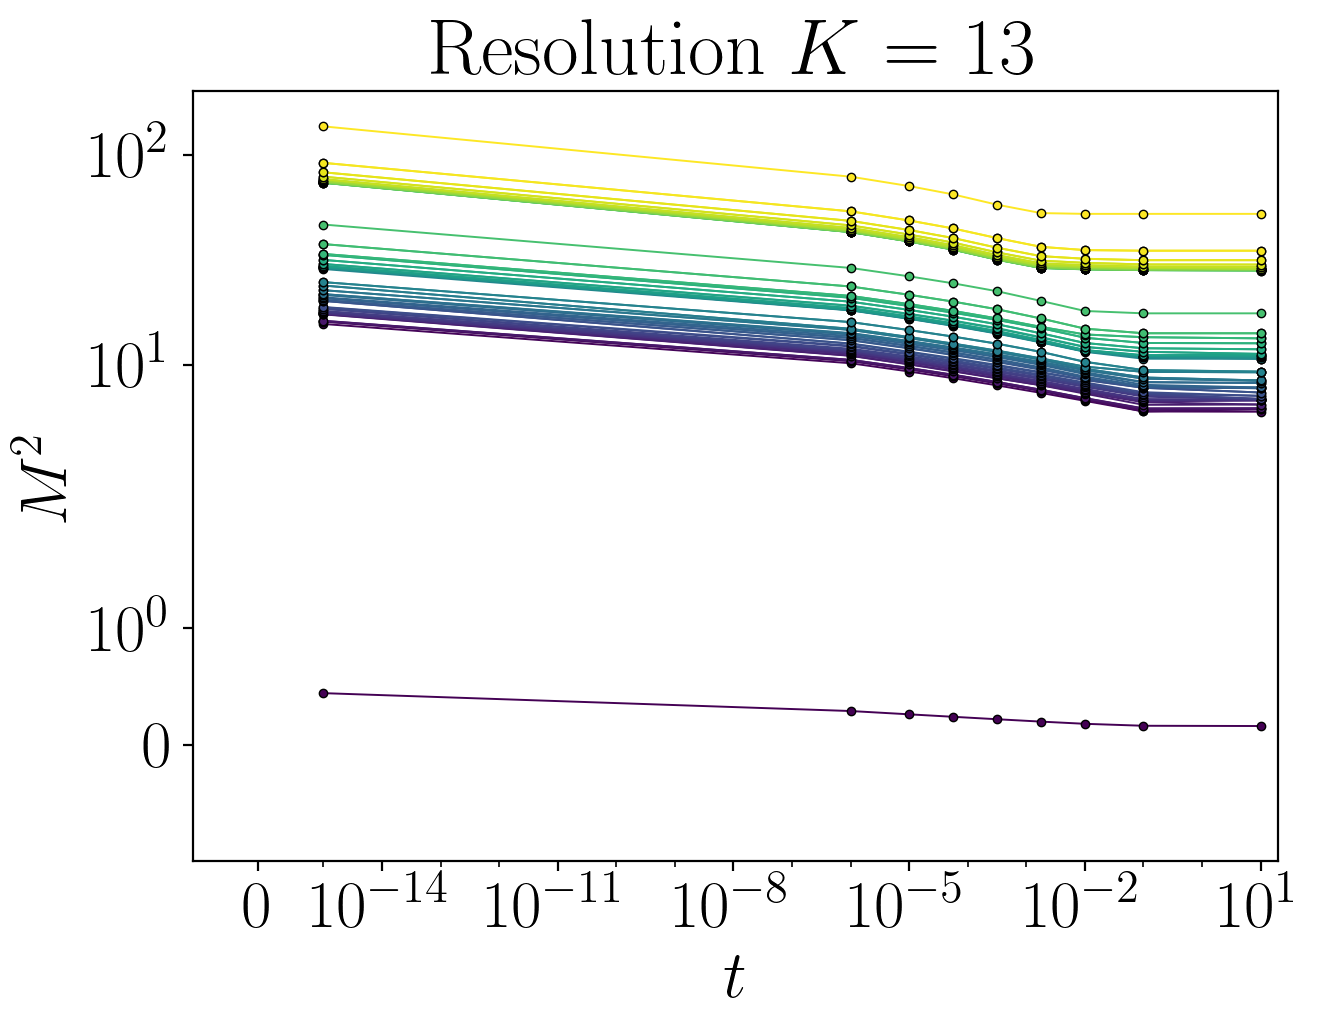

In [ ]:
plt.figure(figsize = (7,5), dpi = 200)
colors = plt.cm.viridis(np.linspace(0, 1, len(shaped_eigs)))
for eigval in range(len(shaped_eigs)):
        plt.plot(ts, shaped_eigs[eigval], color = colors[eigval], linewidth = 0.7, marker = '.', markeredgecolor = 'black', zorder = 2, markeredgewidth = 0.5)
# for i, eigstate in enumerate(shaped_eigs[:,0]):
#         plt.scatter(ts[0], eigstate, color = colors[i], marker = '^', zorder = 2, linewidth = 0.5, edgecolors='black')
# for free_val in free_eigs:
#         plt.axhline(y=free_val, color='grey', linestyle='--', alpha=1, linewidth = 0.5, xmin=0, zorder = 1)

plt.ylabel(f'$M^2$')
plt.xlabel(f'$t$')
plt.xscale('symlog', linthresh=min(ts[ts > 0]))

plt.xlim(-min(ts[ts > 0]), 20)
plt.ylim(-1, 200)
plt.yscale('symlog')
plt.xticks([0,1e-14, 1e-11, 1e-8,1e-5, 1e-2, 1e1])
plt.title(f"Resolution $K = {max_res}$")
plt.show()



In [ ]:
# max_res = 15
# mf = 1
# mb = 0.4
# g = 1
# Q = 0
# n_particles = 4
# num_eigenstates = 1
# resolutions = [max_res]
# ts = np.concatenate((np.logspace(-15, -6, num = 3), np.logspace(-5, -2, num = 5)))#, np.logspace(-2, 1, num = 3)))
# # tmins = []
# for res in np.arange(3, max_res, 2):
#     eigs = []
#     for t in ts:
#         start = time.time()
#         print("***** t = ", t, "*****")
#         vals = get_renormalized_eigenstates([res], t = t, g = g, mf = mf, 
#                 mb = mb, Q = Q, num_eigenstates = num_eigenstates, n_particles = n_particles, verbose = False)[0]
#         eigs.append(vals)
#         end = time.time()
#         print(f"Time for current t: ", (end - start))
#     shaped_eigs = np.hstack(eigs)
#     interp_func = interp1d(ts, mb - np.sqrt(shaped_eigs[0]), kind='linear', bounds_error=False, fill_value="extrapolate")
#     tmins.append(scipy.optimize.root(interp_func,1e-5)['x'][0])
#     print(res, scipy.optimize.root(interp_func,1e-5)['nfev'])



***** t =  1e-15 *****
Time for current t:  0.2166731357574463
***** t =  3.1622776601683794e-11 *****
Time for current t:  0.34125423431396484
***** t =  1e-06 *****
Time for current t:  0.1884479522705078
***** t =  1e-06 *****
Time for current t:  0.18761086463928223
***** t =  1e-05 *****
Time for current t:  0.18573617935180664
***** t =  0.0001 *****
Time for current t:  0.18266010284423828
***** t =  0.001 *****
Time for current t:  0.17937731742858887
***** t =  0.01 *****
Time for current t:  0.17738127708435059
3 9
***** t =  1e-15 *****
Time for current t:  1.4839980602264404
***** t =  3.1622776601683794e-11 *****
Time for current t:  1.500082015991211
***** t =  1e-06 *****
Time for current t:  1.5053398609161377
***** t =  1e-06 *****
Time for current t:  1.4956333637237549
***** t =  1e-05 *****
Time for current t:  1.4943459033966064
***** t =  0.0001 *****
Time for current t:  1.4940550327301025
***** t =  0.001 *****
Time for current t:  1.4931371212005615
***** t =  

In [ ]:
def fun(t, res):
    mb = 0.4
    mf = 1
    g = 1
    Q = 0
    t = t[0]
    if t > 1e-2:
        return 1e6
    val = get_renormalized_eigenstates([res], t = t, g = g, mf = mf, 
                mb = mb, Q = Q, num_eigenstates = 1, n_particles = 4, verbose = False)[0][0]

    return mb**2 - val

Ks = np.arange(3, 20, 2)
Ts = []

for res in Ks:
    Ts.append(scipy.optimize.root(fun, args = (res,), x0 = 1e-8)['x'][0])
    

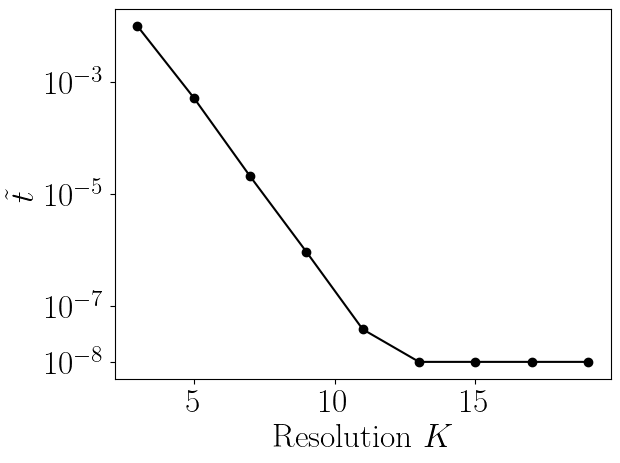

In [ ]:
plt.plot(Ks, Ts, 'ko-')#, marker = 'o', color = 'k')
plt.yscale('log')
plt.xlabel(f'Resolution $K$')
plt.ylabel(r'$\tilde t$')
plt.yticks([1e-3, 1e-5, 1e-7, 1e-8])
plt.show()

In [ ]:
def fun(u, res):
    mb = 0.4
    mf = 1
    g = 1
    Q = 0
    t = np.exp(u[0])
    if t > 1e-2:
        return 1e6
    val = get_renormalized_eigenstates([res], t = t, g = g, mf = mf, 
                mb = mb, Q = Q, num_eigenstates = 1, n_particles = 4, verbose = False)[0][0]

    return mb**2 - val

max_resolution = 19
Ks = np.arange(5, max_resolution + 1, 2)
Ts_log = []
for res in Ks:
    start = time.time()
    print("---res = ", res, "---")
    out = scipy.optimize.root(fun, args = (res,), x0 = np.log(1e-9))
    print(out)
    print(r'\tilde t = ', np.exp(out['x'][0]))
    Ts_log.append(np.exp(out['x'][0]))
    print("Time for optimization:", time.time() - start)

---res =  5 ---
    fjac: array([[-1.]])
     fun: array([5.41233725e-15])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-2.63597005e-10])
       r: array([-0.03118097])
  status: 1
 success: True
       x: array([-7.55390123])
\tilde t =  0.0005240616489747018
Time for optimization: 18.07696509361267
---res =  7 ---
    fjac: array([[-1.]])
     fun: array([-4.96824804e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([1.6501896e-09])
       r: array([-0.03327501])
  status: 1
 success: True
       x: array([-10.78513005])
\tilde t =  2.0705109591029874e-05
Time for optimization: 68.66847777366638
---res =  9 ---
    fjac: array([[-1.]])
     fun: array([-1.75970349e-14])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([2.22211138e-13])
       r: array([-0.02725093])
  status: 1
 success: True
       x: array([-13.89430007])
\tilde t =  9.242344432630811e-07
Time for optimization: 278.3107991218567
---res =  11 ---
    fjac: arra

ZeroDivisionError: float division by zero

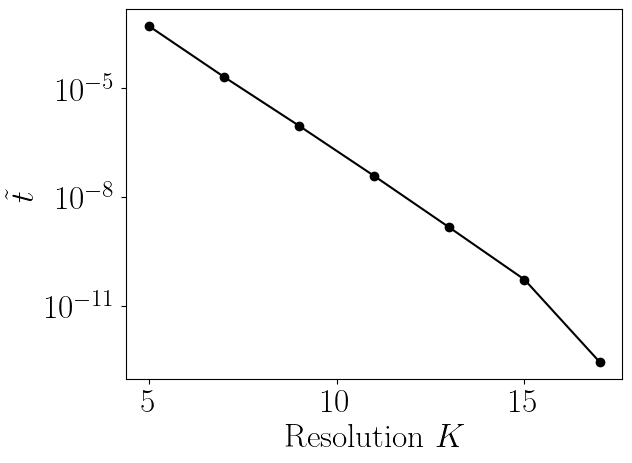

In [ ]:
plt.plot(Ks[:-1], Ts_log, 'ko-')#, marker = 'o', color = 'k')
plt.yscale('log')
plt.xlabel(f'Resolution $K$')
plt.ylabel(r'$\tilde t$')
# plt.yticks([1e-3, 1e-5, 1e-7, 1e-8])
plt.show()

In [ ]:
max_res = 11
mf = 1
mb = 0.4
g = 1
t = 1e-4
Q = 0
n_particles = 4
num_eigenstates = 'all'

resolutions = [max_res]
# resolutions = np.arange(2, max_res, 1)
renormalized_eigenvalues, renormalized_eigenvectors = get_renormalized_eigenstates(resolutions, t = t, g = g, mf = mf, return_focks = True,
                                                                                   mb = mb, Q = Q, num_eigenstates = num_eigenstates, n_particles = n_particles, verbose = True)


---K =  11 ---
Time of renormalized_yukawa_second_order_form_factor: 1.762681007385254
Time of boson_exchange: 1.494368076324463
Time of fermion_exchange: 2.501974105834961
Time of fermion_self_energy (with loop): 0.012708187103271484
Time of antifermion_self_energy (with loop): 0.012623786926269531
Time of boson_self_energy (with loop): 0.01057887077331543
Size of Hamiltonian: 12092
Hamiltonian generated in: 5.96589207649231
Basis generated in: 0.005402803421020508
Generating 228 x 228 Matrix...
Matrix generated in: 8154.7643620967865
Calculating eigenvalues...
Eigenvalues calculated in: 0.025547027587890625
Time to 'Fockify': 20.360605001449585


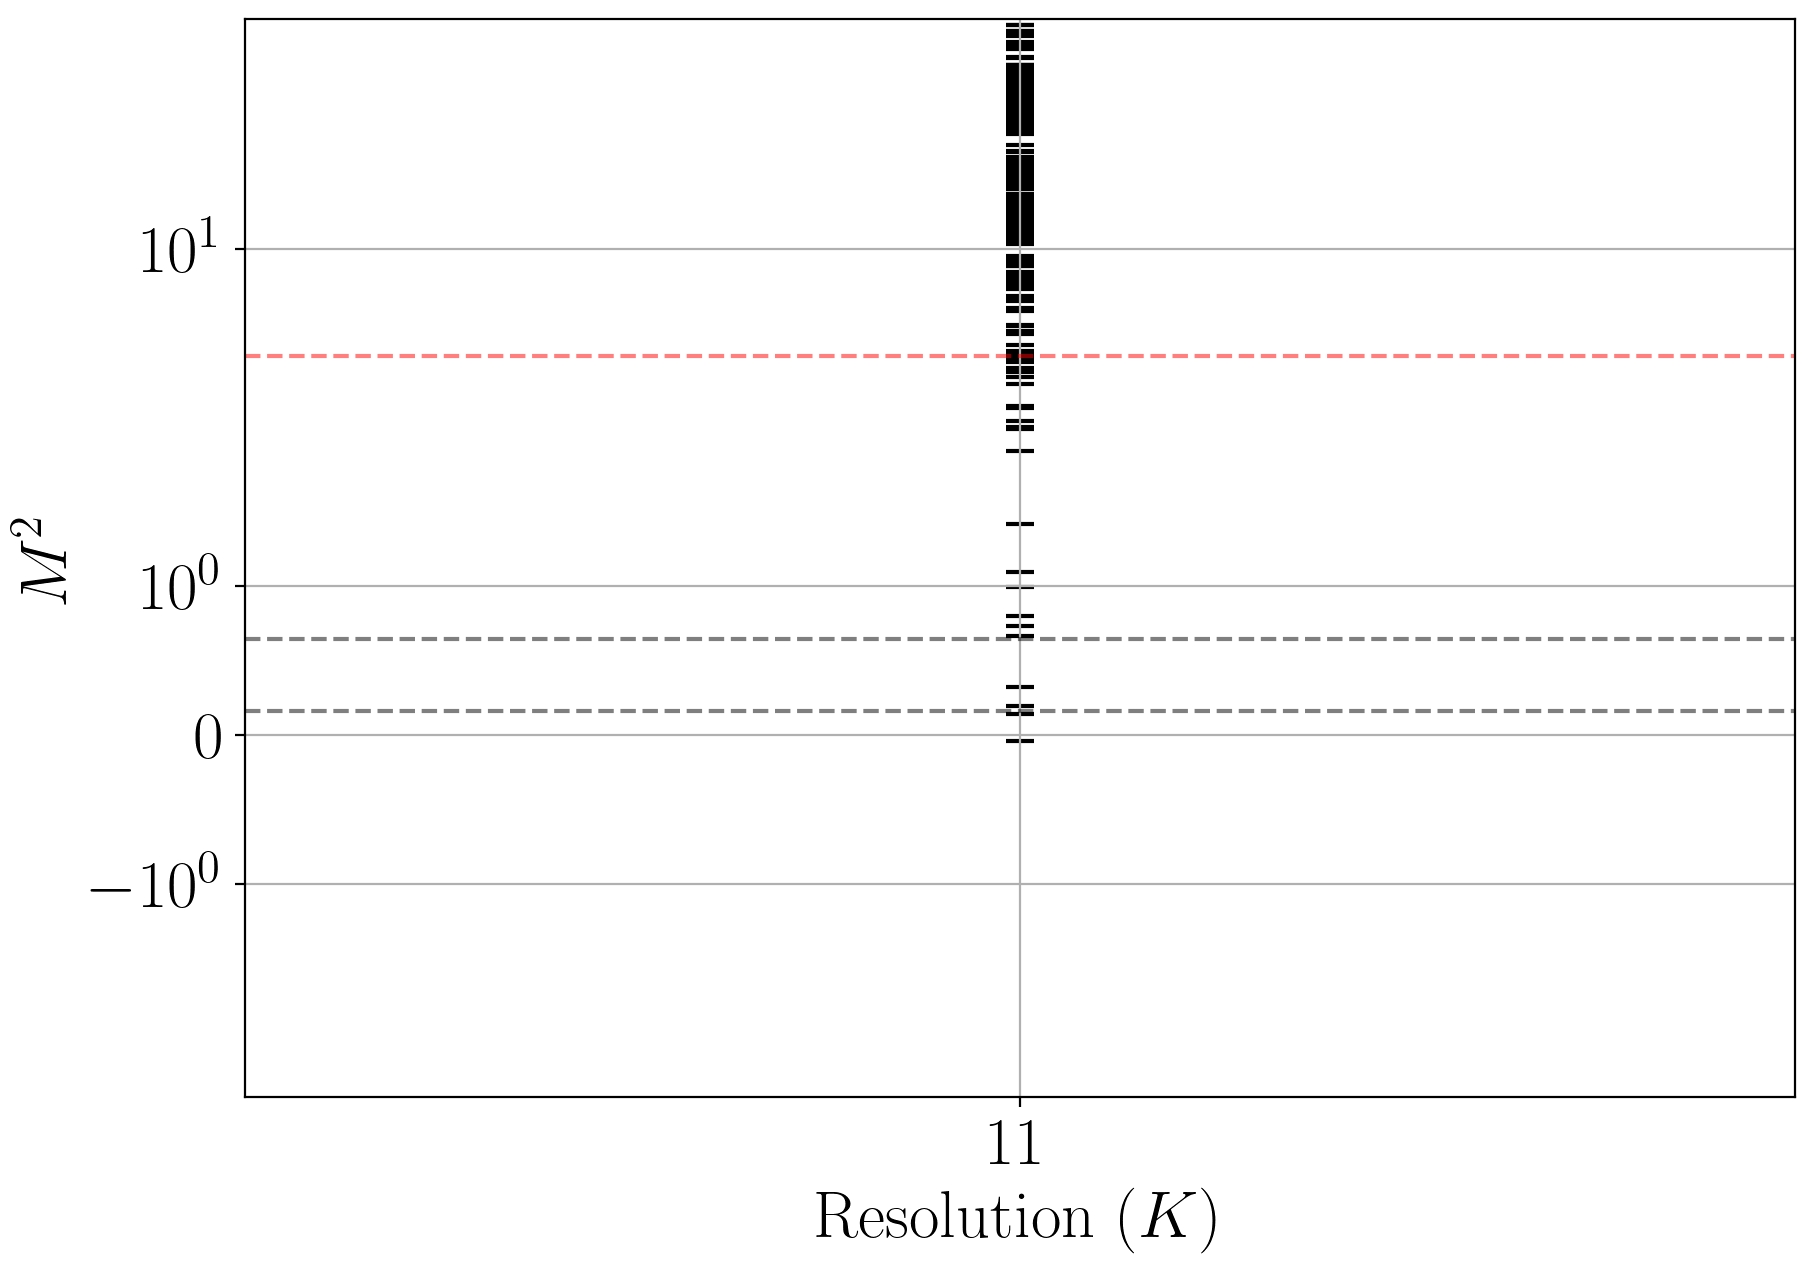

In [ ]:
eigenstate_of_interest = 19
plt.figure(figsize = (10, 7), dpi = 200)
colors = plt.cm.viridis(np.linspace(0, 1, renormalized_eigenvalues.shape[0]))
for i, eig in enumerate(renormalized_eigenvalues):
    # plt.scatter(resolutions, np.sqrt(eig),  color = colors[i], marker = '_', s = 100, label=rf"$E_{{{i}}}$")#
    # if i == eigenstate_of_interest:
    #     plt.scatter(resolutions, (eig), color = 'red', marker='_', s = 100, label = f'Eigenstate {i}')
    # else:
    plt.scatter(resolutions, (eig), color = 'black', marker='_', s = 100)

plt.xlabel("Resolution ($K$)")
plt.ylabel("$M^2$")
plt.axhline(y = 4*mb**2, color = 'k', linestyle = '--', alpha = 0.5) 
plt.axhline(y = 4*mf**2, color = 'r', linestyle = '--', alpha = 0.5) 
plt.axhline(y = mb**2, color = 'k', linestyle = '--', alpha = 0.5)
# plt.axhline(y = (2*mf + mb)**2, color = 'k', linestyle = '--', alpha = 0.5) 
# plt.title( f'$t = {t}$,$g = {g}$, $m_f$ = {mf}, $m_b$ = {mb}')
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5),
#           fancybox=True, shadow=True, ncol=np.ceil(len(renormalized_eigenvalues)/6))
plt.yscale('symlog')
plt.xticks(resolutions)
plt.grid()

In [ ]:
num_eigenvectors = len(renormalized_eigenvectors)
# num_eigenvectors = 19

cols = 3
rows = (num_eigenvectors + cols - 1) // cols  

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 3), dpi=200)
axes = axes.flatten()

handles, labels = [], []
res = max_res
for idx, ax in enumerate(axes):
    if idx < num_eigenvectors:
        psi = renormalized_eigenvectors[idx]
        fermion_pdf = pdf(res, psi, 'fermion')
        antifermion_pdf = pdf(res, psi, 'antifermion')
        boson_pdf = pdf(res, psi, 'boson')

        x_fermion = np.array([k / res for k in np.arange(1 / 2, res, 1)])
        x_boson = np.array([k / res for k in np.arange(1, res + 1, 1)])

    
        scatter_fermion = ax.scatter(x_fermion, np.real(fermion_pdf), marker='.', label='$f$')

        if idx == 0:
            handles.extend([scatter_fermion])
            labels.extend(['$f$'])

        scatter_boson = ax.scatter(x_boson, np.real(boson_pdf), marker='.', label='$b$')
        if idx == 0:
            handles.append(scatter_boson)
            labels.append('b')

        ax.set_xlabel('$x$')
        ax.set_ylabel('$f(x)$')
        # ax.set_yscale('log')
        ax.set_title(f"$M_{{{idx}}}^2 = {round(renormalized_eigenvalues[idx][0], 4)}$")
    else:
        ax.axis('off') 

fig.suptitle(f"{n_particles}-particle PDFs for Renormalized Eigenvectors. $g = {g}, m_f = {mf}, \mu = {mb}$", fontsize=16, y = 1.02)
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0), fancybox=True, shadow=True, ncol=len(labels))



plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

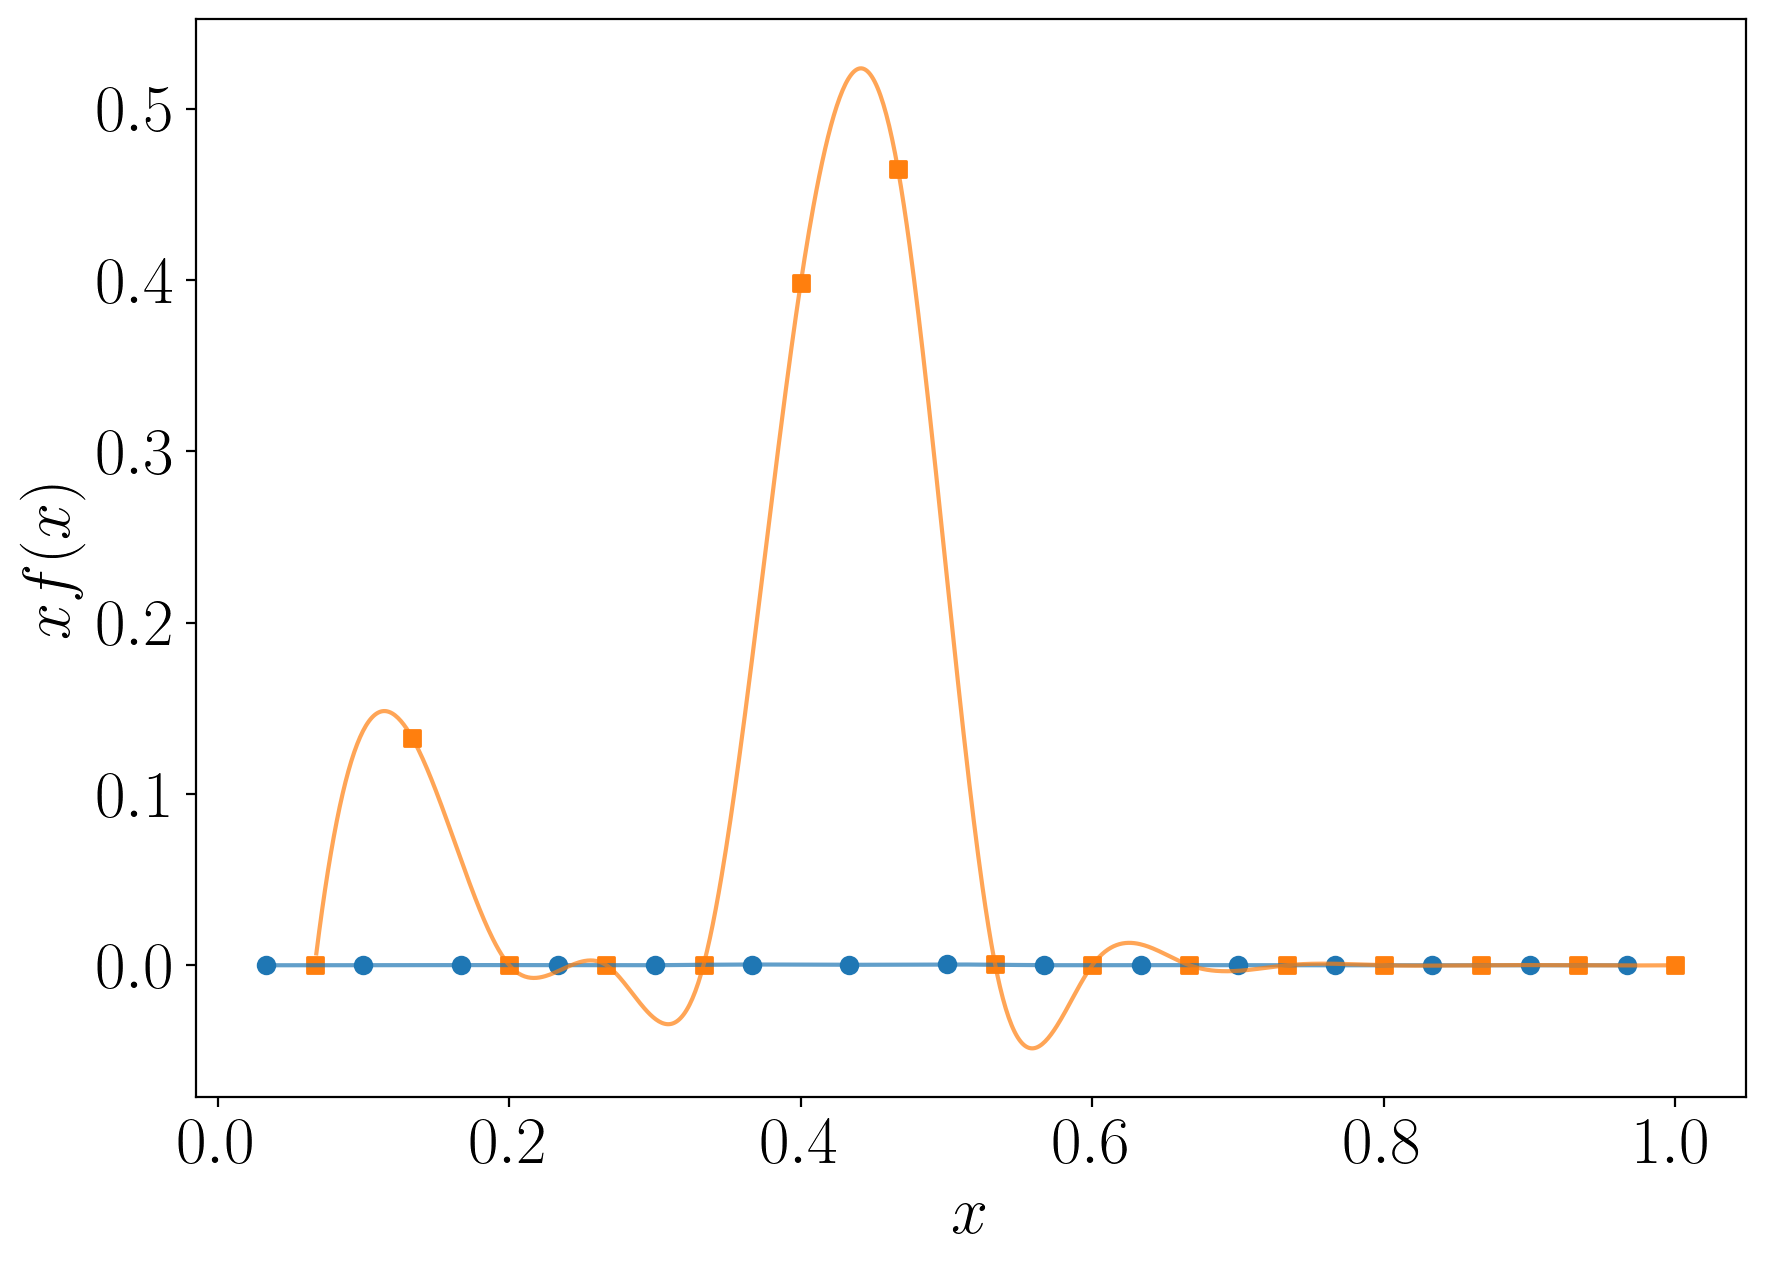

In [ ]:
state = 14
psi = renormalized_eigenvectors[state]
res = max_res

x_fermion = np.array([k/res for k in np.arange(1/2, res, 1)])
fermion_pdf = x_fermion* np.real(pdf(res, psi, 'fermion'))

x_boson = np.array([k/res for k in np.arange(1, res + 1, 1)])
boson_pdf = x_boson * np.real(pdf(res, psi, 'boson'))

dx = 0.001
degree = 3

smooth_x_range_fermion = np.arange(min(x_fermion) + dx, max(x_fermion) - dx, dx)
smooth_x_range_boson = np.arange(min(x_boson) + dx, max(x_boson) - dx, dx)

interp_func_fermion = CubicSpline(x_fermion, fermion_pdf)
interp_func_boson = CubicSpline(x_boson, boson_pdf)

smooth_fermion_pdf = interp_func_fermion(smooth_x_range_fermion)
smooth_boson_pdf = interp_func_boson(smooth_x_range_boson)

plt.figure(figsize = (10,7), dpi = 200)


plt.scatter(x_fermion, fermion_pdf, marker = 'o', label = f'$f$')
plt.plot(smooth_x_range_fermion, smooth_fermion_pdf, alpha = 0.7)

plt.scatter(x_boson, boson_pdf, marker = 's', label = f'$b$')
plt.plot(smooth_x_range_boson, smooth_boson_pdf, alpha = 0.7)
plt.plot([], [], color = 'white', label = f"$M^2 = {round(renormalized_eigenvalues[state][0], 3)}$")

# plt.scatter([], [], color = 'white', label = f'{max_weight}')
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),
#           fancybox=True, shadow=True, ncol=3)
# plt.legend()
plt.xlabel(f'$x$')
plt.ylabel(f'$xf(x)$')
plt.savefig("../pdf.pdf")
# plt.ylim(-0.1, 1.1)
# plt.title(f"Yukawa $Q = {baryon_number}$ bound state PDF")
# plt.title(f"$g = {g}, m = {mf}, \mu = {mb}$")

In [ ]:
plt.figure(figsize = (10, 7), dpi = 200)
for res in np.arange(2, 8, 1):
    bare = yukawa_Hamiltonian(res = res, g = 1, mf = 1, mb = 1)
    ren = renormalized_Yukawa_hamiltonian(res = res, t = 1e-2, treg = 0, g = 1, mf = 1, mb = 1)
    if res == 2:
        plt.scatter(res, len(bare), color = 'blue', marker = 'o', label = 'Bare Hamiltonian')
        plt.scatter(res, len(ren), color = 'black', marker = 'o', label = 'Renormalized Hamiltonian')
    else:
        plt.scatter(res, len(bare), color = 'blue', marker = 'o')
        plt.scatter(res, len(ren), color = 'black', marker = 'o')

plt.xlabel("Resolution ($K$)")
plt.ylabel("Number of terms in Hamiltonian")
plt.yscale('log')
plt.legend()
plt.savefig('../n_terms.pdf')